<a href="https://colab.research.google.com/github/katemartian/LHoutputsManuscript/blob/master/LHoutputs_APT_SCT_OFT_TST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> LHoutputs 
APT SCT OFT TST



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata/

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/rawdata


In [ ]:
%run FiberPhotometryDataAnalysis_elife.ipynb

All Fiber Photometry functions are ready to use


In [ ]:
mice = ['LHA1','LHA2','LHA3','LHA4','LHA5','LHA6','LHA7','LHA8','LHA9','LHA10','LHA11','LHA12',
        'LHA13','LHA14','LHA15','LHA16','LHA17']
outputs = ['LHA-LHb', 'LHA-VTA','LHA-DRN']        
tests = ['APT','SCT','OFT','TST']

In [ ]:
filename = 'LH_APT-SCT-OFT-TST.h5'

# Save recordings to HDF file

In [ ]:
folders = { 'APT': ['/content/drive/My Drive/!lab/!FP/Wrap-up of LHA/AP/raw/'],
            'SCT': ['/content/drive/My Drive/!lab/!FP/Wrap-up of LHA/SCT/raw/'],
            'OFT': ['/content/drive/My Drive/!lab/!FP/Wrap-up of LHA/OFT/raw/'],
            'TST': ['/content/drive/My Drive/!lab/!FP/Wrap-up of LHA/TST/raw/']}

#### APT

In [ ]:
test = 'APT'
apt_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    apt_full_file_names.append(folder+f)
#apt_full_file_names

In [ ]:
for file_ in apt_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]

  if experiment[-1] == 'f': # for LHA13,14,15,16,17
    outputs = ['LHA-LHb','LHA-VTA','LHA-DRN']
    trial = '1'
  elif experiment[-1] in ['1','2','3']: # for first 3 trials with only one connection
    outputs = ['LHA-'+sepname[1]]
    trial = experiment[-1]
  else:
    outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]
    trial = experiment[-1]

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      try:
        signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])
      except:
        signals[output] = np.array(df['MeanInt_470560nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Events
  v = np.array(df['Event_410nm'])
  dv = np.diff(v)
  airpuff = [time_[i] for i in range(len(dv)) if dv[i-1]>0]
  airpuff = np.array(airpuff).reshape(len(airpuff),1)
  airpuff = airpuff - 0.2

  events = {'airpuff': airpuff}

    
  raw = FiberPhotometryRecording(signals,references,time_,events,mouse=mouse,test='APT',trial=trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA1 APT 2 ['LHA-VTA']
LHA1 APT 3 ['LHA-DRN']
LHA1 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA1 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA1 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA1 APT 1 ['LHA-LHb']
LHA1 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA2 APT 3 ['LHA-DRN']
LHA2 APT 1 ['LHA-LHb']
LHA2 APT 2 ['LHA-VTA']
LHA2 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA3 APT 4 ['LHA-DRN', 'LHA-VTA']
LHA3 APT 3 ['LHA-DRN']
LHA3 APT 1 ['LHA-LHb']
LHA3 APT 2 ['LHA-VTA']
LHA6 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA3 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA3 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA4 APT 2 ['LHA-VTA']
LHA4 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA4 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA4 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA4 APT 5 ['LHA-VTA', 'LHA-DRN']
LHA5 APT 1 ['LHA-LHb']
LHA4 APT 1 ['LHA-LHb']
LHA5 APT 2 ['LHA-VTA']
LHA6 APT 1 ['LHA-LHb']
LHA6 APT 2 ['LHA-VTA']
LHA8 APT 3 ['LHA-DRN']
LHA5 APT 3 ['LHA-DRN']
LHA6 APT 4 ['LHA-DRN', 'LHA-LHb']
LHA4 APT 3 ['LHA-DRN']
LHA8 APT 1 ['LHA-LHb']
LHA6 APT 6 ['LHA-LHb', 'LHA-DRN']
LHA6 APT 7 ['LHA-VTA', 'LHA-DRN']
LHA8 APT 2 ['LHA-VT

#### SCT

In [ ]:
test = 'SCT'
sct_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    sct_full_file_names.append(folder+f)
#sct_full_file_names

In [ ]:
for file_ in sct_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'e':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Behavioral events -----------------------------------------------------------

 # Sucrose licking measured manually
  licks = np.array(df['Event_410nm'])
  licks[licks==1] = 0
  licks[licks>1] = 1
  consumption = event_onoffset(licks,time_)
  if len(consumption) != 0:
    consumption = adjust_intervals_durations(consumption,1,1)
  if consumption.shape == (2,):
    consumption = consumption.reshape(1,2)

 # Adjust consumption onset
  consumption[:,0] = consumption[:,0]-0.5

  events = {'consumption': consumption}

  measurements = {'licks': {'time': time_,
                          'values': licks}}
  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'SCT',trial)
  raw.saveRecording(filename)
  print(raw.mouse,raw.test,raw.trial,raw.outputs)

LHA10 SCT 3 ['LHA-DRN', 'LHA-VTA']
LHA10 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA10 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA11 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA11 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA12 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA12 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA12 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA13 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA14 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 SCT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA1 SCT 4 ['LHA-DRN', 'LHA-VTA']
LHA1 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA1 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA2 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA2 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA2 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 3 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA3 SCT 1 ['LHA-LHb', 'LHA-DRN']
LHA4 SCT 3 ['LHA-DRN', 'LHA-LHb']
LHA4 SCT 4 ['LHA-DRN', 'LHA-VTA']
LHA4 SCT 1 ['LHA-DRN', 'LHA-LHb']
LHA4 SCT 2 ['LHA-DRN', 'LHA-VTA']
LHA5 SCT 1 ['L

#### OFT

In [ ]:
test = 'OFT'
oft_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    oft_full_file_names.append(folder+f)
#oft_full_file_names

In [ ]:
for file_ in oft_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'T':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)


 # Behavioral events -----------------------------------------------------------

 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  time_am = np.array(df_am['Time'])
  
 # Movement 
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
 # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.1, 0.15)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'OFT',trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA10 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA14 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 OFT 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA1 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA3 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA3 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA4 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA6 OFT 2 ['LHA-LHb', 'LHA-DRN']
LHA6 OFT 1 ['LHA-VTA', 'LHA-DRN']
LHA8 OFT 1 ['LHA-LHb', 'LHA-DRN']
LHA9 OFT 1 ['LHA-VTA', 'LHA-DRN']


#### TST

In [ ]:
test = 'TST'
tst_full_file_names = []
for folder in folders[test]:
  files = find_files(folder,['.xlsx'])
  for f in files:
    tst_full_file_names.append(folder+f)
#tst_full_file_names

In [ ]:
for file_ in tst_full_file_names:

  file_split = file_.split('/') 
  name = file_split[-1]
  folder = '/'.join(file_split[:-1])

  # Experiment info ------------------------------------------------------------
  sepname = name.split('_')      
  mouse = sepname[0]
  experiment = sepname[-1][:-5]
  outputs = ['LHA-'+sepname[1],'LHA-'+sepname[2],'LHA-'+sepname[3]]

  if experiment[-1] == 'T':
    trial = '1'
  else:
    n_trial = int(experiment[-1])
    if n_trial > 2:
      trial = str(n_trial-1)
    else:
      trial = str(n_trial)

 # Read data
  df = pd.read_excel(file_,index_col=False)
  df = df[1:]

 # Time
  realtime_fp = [str(t) for t in df['Datetime_410nm']]
  time_ = time_to_seconds(realtime_fp, realtime_fp[0])
  
 # Signals
  references = {}
  signals = {}
  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      pass
    else:
      references[output] = np.array(df['MeanInt_410nm_'+str(fiber*2+1)])
      signals[output] = np.array(df['MeanInt_470nm_'+str(fiber*2+1)])

  for fiber,output in enumerate(outputs):
    if output in ['LHA-1','LHA-2','LHA-3']:
      outputs.pop(fiber)

 # Behavioral events -----------------------------------------------------------

 # Anymaze file
  name_am = mouse+'_'+experiment+'_anymaze.csv'
  df_am = pd.read_csv(folder+'/'+name_am,sep=',',index_col=False)
  time_am = np.array(df_am['Time'])
  
 # Movement 
  speed = np.array(df_am['Speed'])*100 # cm/s
  mobility_score = np.array(df_am['Freezing score'])
  movement = np.interp(speed, (np.nanmin(speed),np.nanmax(speed)), (0,1))
 # Immobility onsets and offsets
  immobility = find_onoffset_immobility(movement, time_am, 1, 0.15, 0.2)

  events = {'immobility': immobility}

  measurements = {'movement': {'time': time_am,
                             'values': movement}}

  
  raw = FiberPhotometryRecording(signals,references,time_,events,measurements,mouse,'TST',trial)
  raw.saveRecording(filename)
  print(raw.mouse, raw.test, raw.trial, raw.outputs)

LHA14 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA15 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA16 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA17 TST 1 ['LHA-LHb', 'LHA-VTA', 'LHA-DRN']
LHA1 TST 2 ['LHA-LHb', 'LHA-DRN']
LHA1 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA3 TST 2 ['LHA-LHb', 'LHA-DRN']
LHA3 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA6 TST 1 ['LHA-VTA', 'LHA-DRN']
LHA8 TST 1 ['LHA-LHb', 'LHA-DRN']
LHA9 TST 1 ['LHA-VTA', 'LHA-DRN']


# Processing data

In [ ]:
info_for_array = {'airpuff': {'window': [-5.0,5.0],
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (12,10)},
              'consumption': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                           'avg_frame': [-2.0,-1.0],
                             'figsize': (24,10)},
               'immobility': {'window': [-5.0,5.0],
                            'duration': 2.0,
                           'interaval': 2.0,
                             'figsize': (24,10)}}

In [ ]:
for test in tests:
  for mouse in mice:
    for trial in ['1','2','3','4','5','6','7']:

        r = FiberPhotometryRecording()
        r.loadRecording(filename,mouse,test,trial)
        if r.rawSignals != {}:
          r.getDFF(airpls_lambda=5e3,smooth_win=1)
          if r.measurements is not None:
            r.smoothMeasurements(smooth_win=2)
            r.interpolateMeasurements()
          r.getPerievents(info_for_array)
          r.saveRecording(filename)
        del r

# Example traces

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA15','APT','1')
r.getDFF(airpls_lambda=5e3,smooth_win=1.5)

The recording for mouse LHA15 in the experiment APT-1 is successfully loaded.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


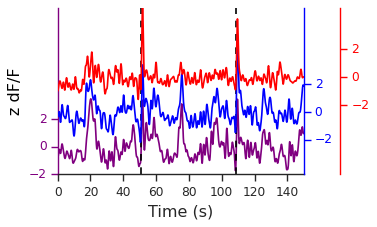

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],event='airpuff',
              t0=130,t1=280,
              ylim=[-2,10],ylim1=[-4.5,7.5],ylim2=[-7,5],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              figsize=(5,3))
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA16','SCT','1')
r.getDFF(airpls_lambda=5e3,smooth_win=1.5)

The recording for mouse LHA16 in the experiment SCT-1 is successfully loaded.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


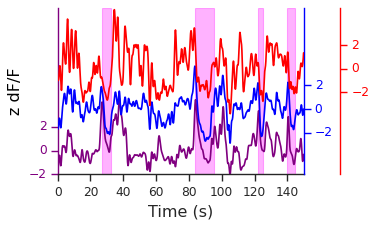

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],'consumption',
              t0=35,t1=185,
              ylim=[-2,12],ylim1=[-5.5,8.5],ylim2=[-9,5.2], 
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              figsize=(5,3))
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA15','OFT','1')
r.getDFF(airpls_lambda=5e3,smooth_win=1.5)

The recording for mouse LHA15 in the experiment OFT-1 is successfully loaded.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

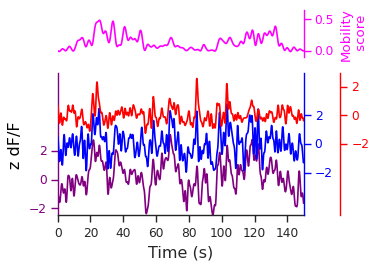

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],measure='movement',
              t0=445,t1=595,
              ylim=[-2.5,7.5],ylim1=[-5,5],ylim2=[-7,3],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              ylim_m=[-0.1,0.65],yticks_m=[0,0.5],
              figsize=(5,3.5))
plt.show()

In [ ]:
r = FiberPhotometryRecording()
r.loadRecording(filename,'LHA16','TST','1')
r.getDFF(airpls_lambda=5e3,smooth_win=1.5)

The recording for mouse LHA16 in the experiment TST-1 is successfully loaded.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

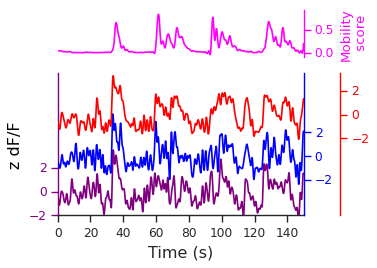

In [ ]:
r.plotExample(['LHA-DRN','LHA-VTA','LHA-LHb'],measure='movement',
              t0=319,t1=469,
              ylim=[-2,10],ylim1=[-5,7],ylim2=[-8.5,3.5],
              yticks=[-2,0,2],yticks1=[-2,0,2],yticks2=[-2,0,2],
              ylim_m=[-0.1,0.95],yticks_m=[0,0.5],
              figsize=(5,3.5))
plt.show()

# Summary plots

#### Set attributes to the HDF file

In [ ]:
with h5py.File(filename,'a') as f:
  f.attrs['mice'] = mice
  f.attrs['outputs'] = outputs
  f.attrs['tests'] = tests

In [ ]:
with h5py.File(filename, 'a') as f:
  f.attrs['good recordings'] = [['LHA1','APT','4','LHA-LHb'],
                                ['LHA1','APT','6','LHA-LHb'],
                                ['LHA1','APT','2','LHA-VTA'],
                                ['LHA1','APT','5','LHA-VTA'],
                                ['LHA1','APT','7','LHA-VTA'],
                                ['LHA1','APT','4','LHA-DRN'],
                                ['LHA2','APT','1','LHA-LHb'],
                                ['LHA2','APT','4','LHA-LHb'],
                                ['LHA2','APT','3','LHA-DRN'],
                                ['LHA3','APT','6','LHA-LHb'],
                                ['LHA3','APT','2','LHA-VTA'],
                                ['LHA3','APT','7','LHA-VTA'],
                                ['LHA3','APT','3','LHA-DRN'],
                                ['LHA3','APT','6','LHA-DRN'],
                                ['LHA4','APT','1','LHA-LHb'],
                                ['LHA4','APT','4','LHA-LHb'],
                                ['LHA4','APT','6','LHA-LHb'],
                                ['LHA4','APT','2','LHA-VTA'],
                                ['LHA4','APT','5','LHA-VTA'],
                                ['LHA4','APT','7','LHA-VTA'],
                                ['LHA4','APT','4','LHA-DRN'],
                                ['LHA4','APT','5','LHA-DRN'],
                                ['LHA4','APT','6','LHA-DRN'],
                                ['LHA6','APT','1','LHA-LHb'],
                                ['LHA6','APT','4','LHA-LHb'],
                                ['LHA6','APT','6','LHA-LHb'],
                                ['LHA6','APT','5','LHA-VTA'],
                                ['LHA6','APT','4','LHA-DRN'],
                                ['LHA6','APT','5','LHA-DRN'],
                                ['LHA6','APT','6','LHA-DRN'],
                                ['LHA9','APT','4','LHA-VTA'],
                                ['LHA9','APT','7','LHA-VTA'],
                                ['LHA9','APT','4','LHA-DRN'],
                                ['LHA9','APT','6','LHA-DRN'],
                                ['LHA10','APT','2','LHA-VTA'],
                                ['LHA10','APT','4','LHA-VTA'],
                                ['LHA10','APT','7','LHA-VTA'],
                                ['LHA10','APT','3','LHA-DRN'],
                                ['LHA10','APT','4','LHA-DRN'],
                                ['LHA10','APT','6','LHA-DRN'],
                                ['LHA12','APT','1','LHA-LHb'],
                                ['LHA12','APT','4','LHA-LHb'],
                                ['LHA12','APT','6','LHA-LHb'],
                                ['LHA12','APT','6','LHA-DRN'],
                                ['LHA12','APT','7','LHA-DRN'],
                                ['LHA13','APT','1','LHA-LHb'],
                                ['LHA13','APT','1','LHA-VTA'],
                                ['LHA13','APT','1','LHA-DRN'],
                                ['LHA14','APT','1','LHA-VTA'],
                                ['LHA14','APT','1','LHA-DRN'],
                                ['LHA15','APT','1','LHA-LHb'],
                                ['LHA15','APT','1','LHA-VTA'],
                                ['LHA15','APT','1','LHA-DRN'],
                                ['LHA16','APT','1','LHA-LHb'],
                                ['LHA16','APT','1','LHA-VTA'],
                                ['LHA16','APT','1','LHA-DRN'],
                                ['LHA17','APT','1','LHA-LHb'],
                                ['LHA17','APT','1','LHA-VTA'],
                                ['LHA1','SCT','1','LHA-LHb'],
                                ['LHA1','SCT','3','LHA-LHb'],
                                ['LHA1','SCT','4','LHA-VTA'],
                                ['LHA1','SCT','1','LHA-DRN'],
                                ['LHA1','SCT','3','LHA-DRN'],
                                ['LHA1','SCT','4','LHA-DRN'],
                                ['LHA2','SCT','1','LHA-LHb'],
                                ['LHA2','SCT','3','LHA-LHb'],
                                ['LHA2','SCT','2','LHA-VTA'],
                                ['LHA2','SCT','1','LHA-DRN'],
                                ['LHA2','SCT','3','LHA-DRN'],
                                ['LHA3','SCT','1','LHA-LHb'],
                                ['LHA3','SCT','2','LHA-VTA'],
                                ['LHA3','SCT','3','LHA-VTA'],
                                ['LHA3','SCT','2','LHA-DRN'],
                                ['LHA3','SCT','3','LHA-DRN'],
                                ['LHA4','SCT','1','LHA-LHb'],
                                ['LHA4','SCT','3','LHA-LHb'],
                                ['LHA4','SCT','2','LHA-VTA'],
                                ['LHA4','SCT','4','LHA-VTA'],
                                ['LHA4','SCT','1','LHA-DRN'],
                                ['LHA4','SCT','2','LHA-DRN'],
                                ['LHA4','SCT','3','LHA-DRN'],
                                ['LHA4','SCT','4','LHA-DRN'],
                                ['LHA5','SCT','1','LHA-LHb'],
                                ['LHA5','SCT','2','LHA-VTA'],
                                ['LHA5','SCT','1','LHA-DRN'],
                                ['LHA6','SCT','1','LHA-LHb'],
                                ['LHA6','SCT','2','LHA-VTA'],
                                ['LHA6','SCT','4','LHA-VTA'],
                                ['LHA6','SCT','2','LHA-DRN'],
                                ['LHA6','SCT','4','LHA-DRN'],
                                ['LHA9','SCT','1','LHA-LHb'],
                                ['LHA9','SCT','2','LHA-VTA'],
                                ['LHA9','SCT','3','LHA-VTA'],
                                ['LHA9','SCT','1','LHA-DRN'],
                                ['LHA9','SCT','2','LHA-DRN'],
                                ['LHA10','SCT','2','LHA-VTA'],
                                ['LHA10','SCT','3','LHA-VTA'],
                                ['LHA10','SCT','1','LHA-DRN'],
                                ['LHA10','SCT','2','LHA-DRN'],
                                ['LHA10','SCT','3','LHA-DRN'],
                                ['LHA11','SCT','1','LHA-DRN'],
                                ['LHA12','SCT','1','LHA-LHb'],
                                ['LHA12','SCT','3','LHA-LHb'],
                                ['LHA12','SCT','3','LHA-DRN'],
                                ['LHA14','SCT','1','LHA-LHb'],
                                ['LHA14','SCT','1','LHA-VTA'],
                                ['LHA14','SCT','1','LHA-DRN'],
                                ['LHA15','SCT','1','LHA-LHb'],
                                ['LHA15','SCT','1','LHA-VTA'],
                                ['LHA15','SCT','1','LHA-DRN'],
                                ['LHA16','SCT','1','LHA-LHb'],
                                ['LHA16','SCT','1','LHA-VTA'],
                                ['LHA16','SCT','1','LHA-DRN'],
                                ['LHA17','SCT','1','LHA-LHb'],
                                ['LHA17','SCT','1','LHA-VTA'],
                                ['LHA17','SCT','1','LHA-DRN'],
                                ['LHA1','OFT','2','LHA-LHb'],
                                ['LHA1','OFT','1','LHA-VTA'],
                                ['LHA1','OFT','1','LHA-DRN'],
                                ['LHA1','OFT','2','LHA-DRN'],
                                ['LHA3','OFT','2','LHA-DRN'],
                                ['LHA4','OFT','1','LHA-DRN'],
                                ['LHA6','OFT','2','LHA-LHb'],
                                ['LHA6','OFT','1','LHA-VTA'],
                                ['LHA6','OFT','1','LHA-DRN'],
                                ['LHA8','OFT','1','LHA-LHb'],
                                ['LHA8','OFT','1','LHA-DRN'],
                                ['LHA9','OFT','1','LHA-VTA'],
                                ['LHA9','OFT','1','LHA-DRN'],
                                ['LHA10','OFT','1','LHA-DRN'],
                                ['LHA14','OFT','1','LHA-VTA'],
                                ['LHA14','OFT','1','LHA-DRN'],
                                ['LHA15','OFT','1','LHA-LHb'],
                                ['LHA15','OFT','1','LHA-VTA'],
                                ['LHA15','OFT','1','LHA-DRN'],
                                ['LHA16','OFT','1','LHA-LHb'],
                                ['LHA16','OFT','1','LHA-VTA'],
                                ['LHA16','OFT','1','LHA-DRN'],
                                ['LHA17','OFT','1','LHA-VTA'],
                                ['LHA17','OFT','1','LHA-DRN'],
                                ['LHA1','TST','2','LHA-LHb'],
                                ['LHA1','TST','1','LHA-VTA'],
                                ['LHA1','TST','1','LHA-DRN'],
                                ['LHA1','TST','1','LHA-DRN'],
                                ['LHA3','TST','2','LHA-LHb'],
                                ['LHA3','TST','2','LHA-DRN'],
                                ['LHA6','TST','1','LHA-VTA'],
                                ['LHA6','TST','1','LHA-DRN'],
                                ['LHA8','TST','1','LHA-LHb'],
                                ['LHA8','TST','1','LHA-DRN'],
                                ['LHA9','TST','1','LHA-VTA'],
                                ['LHA9','TST','1','LHA-DRN'],
                                ['LHA14','TST','1','LHA-LHb'],
                                ['LHA14','TST','1','LHA-VTA'],
                                ['LHA14','TST','1','LHA-DRN'],
                                ['LHA15','TST','1','LHA-LHb'],
                                ['LHA15','TST','1','LHA-VTA'],
                                ['LHA15','TST','1','LHA-DRN'],
                                ['LHA16','TST','1','LHA-LHb'],
                                ['LHA16','TST','1','LHA-VTA'],
                                ['LHA16','TST','1','LHA-DRN']]

#### APT

In [ ]:
apt = FiberPhotometryTest(filename,'APT')

Experiment information for test APT is successfully loaded.


In [ ]:
apt.getMeans(auc_frames={'airpuff-onset': [[-2,-1],[0,1.5]]})

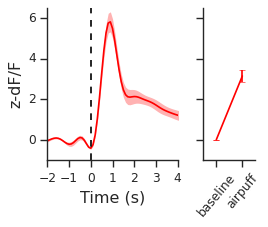

In [ ]:
apt.plotMeans('LHA-LHb','airpuff','onset',
              plot_type='mean and SEM',
              color='red',periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

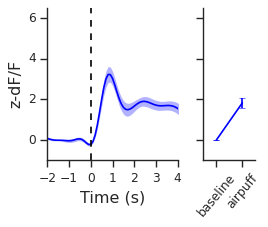

In [ ]:
apt.plotMeans('LHA-VTA','airpuff','onset',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

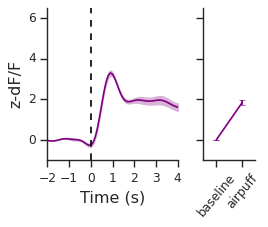

In [ ]:
apt.plotMeans('LHA-DRN','airpuff','onset',
              plot_type='mean and SEM',
              color='purple', periods=['baseline','airpuff'],
              xlim=[-2,4],ylim=[-1,6.5],yticks=[0,2,4,6])
plt.show()

#### SCT

In [ ]:
sct = FiberPhotometryTest(filename,'SCT')

Experiment information for test SCT is successfully loaded.


In [ ]:
sct.getMeans(auc_frames={'consumption-onset': [[-2,-1],[-0.5,1],[2,4]],
                        'consumption-offset': [[-3,-1],[1,3]]})

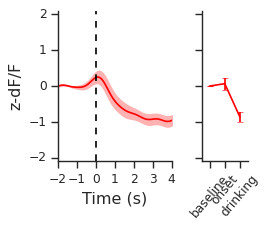

In [ ]:
sct.plotMeans('LHA-LHb','consumption','onset',
              plot_type='mean and SEM',
              color='red',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

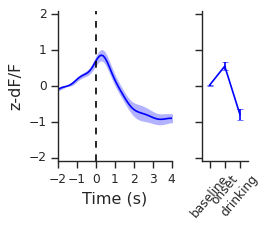

In [ ]:
sct.plotMeans('LHA-VTA','consumption','onset',
              plot_type='mean and SEM',
              color='blue',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

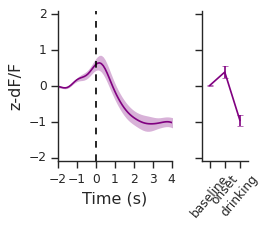

In [ ]:
sct.plotMeans('LHA-DRN','consumption','onset',
              plot_type='mean and SEM',
              color='purple',periods=['baseline','onset','drinking'],
              xlim=[-2,4],ylim=[-2.1,2.1])
plt.show()

#### OFT

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [ ]:
oft.getMeans(auc_frames = {'immobility-onset': [[-3,-1],[1,3]],
                          'immobility-offset': [[-3,-1],[-1,0],[0,1],[1,3]]})

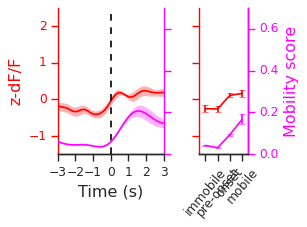

In [ ]:
oft.plotMeans('LHA-LHb','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

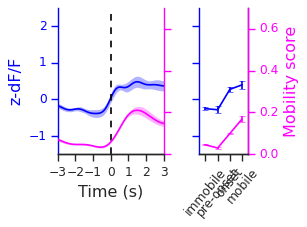

In [ ]:
oft.plotMeans('LHA-VTA','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['immobile','pre-onset','onset','mobile'],#['1','2','3','4','5','6'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

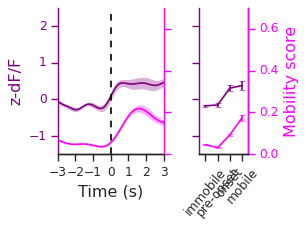

In [ ]:
oft.plotMeans('LHA-DRN','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['immobile','pre-onset','onset','mobile'],#['1','2','3','4','5','6'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

#### TST


In [ ]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [ ]:
tst.getMeans(auc_frames={'immobility-onset': [[-3,-1],[1,3]],
                        'immobility-offset': [[-3,-1],[-1,0],[0,1],[1,3]]})

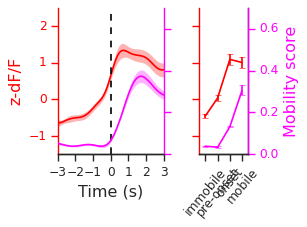

In [ ]:
tst.plotMeans('LHA-LHb','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='red',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

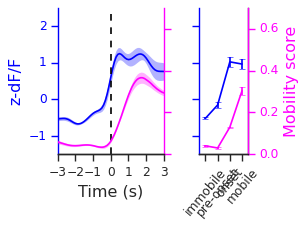

In [ ]:
tst.plotMeans('LHA-VTA','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='blue',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

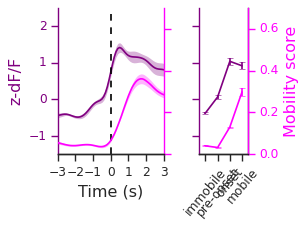

In [ ]:
tst.plotMeans('LHA-DRN','immobility','offset',measure='movement',
              plot_type='mean and SEM',
              color='purple',periods=['immobile','pre-onset','onset','mobile'],
              ylim=[-1.5,2.5],yticks=[-1,0,1,2],xlim=[-3,3],
              ylim1=[0,0.7],yticks1=[0,0.2,0.4,0.6],
              subplot_ratio=[5,2.3],figsize=(4,3))
plt.show()

# Total correlation of calcium signal between LH outputs

In [ ]:
apt = FiberPhotometryTest(filename,'APT')
apt.getOutputCorrelation('LHA-DRN','LHA-VTA')
apt.getOutputCorrelation('LHA-DRN','LHA-LHb')
apt.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
sct = FiberPhotometryTest(filename,'SCT')
sct.getOutputCorrelation('LHA-DRN','LHA-VTA')
sct.getOutputCorrelation('LHA-DRN','LHA-LHb')
sct.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')
oft.getOutputCorrelation('LHA-DRN','LHA-VTA')
oft.getOutputCorrelation('LHA-DRN','LHA-LHb')
oft.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
tst = FiberPhotometryTest(filename,'TST')
tst.getOutputCorrelation('LHA-DRN','LHA-VTA')
tst.getOutputCorrelation('LHA-DRN','LHA-LHb')
tst.getOutputCorrelation('LHA-VTA','LHA-LHb')

In [ ]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


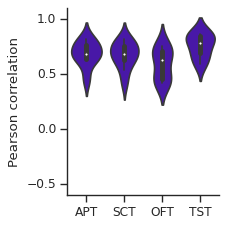

In [ ]:
exp.plotRoverTests('LHA-DRN',output1='LHA-VTA',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.25,0,0.75))
plt.show()

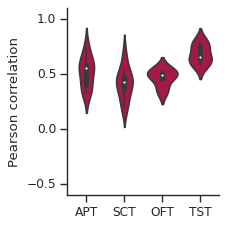

In [ ]:
exp.plotRoverTests('LHA-DRN',output1='LHA-LHb',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.75,0,0.25))
plt.show()

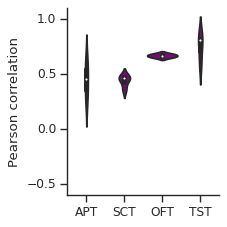

In [ ]:
exp.plotRoverTests('LHA-VTA',output1='LHA-LHb',tests=['APT','SCT','OFT','TST'],
                 ylabel='Pearson correlation',ylim=[-0.6,1.1],yticks=[-0.5,0,0.5,1],color=(0.5,0,0.5))
plt.show()

# Total correlation between mobility score and calcium signal

OFT-TST

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [ ]:
oft.getMeasureCorrelation('movement')

In [ ]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [ ]:
tst.getMeasureCorrelation('movement')

In [ ]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


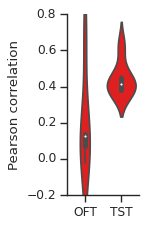

In [ ]:
exp.plotRoverTests('LHA-LHb',measure='movement',tests=['OFT','TST'],
                 color='red',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

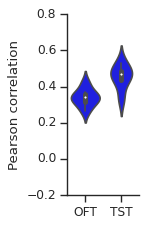

In [ ]:
exp.plotRoverTests('LHA-VTA',measure='movement',tests=['OFT','TST'],
                 color='blue',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

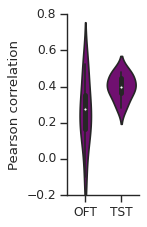

In [ ]:
exp.plotRoverTests('LHA-DRN',measure='movement',tests=['OFT','TST'],
                 color='purple',ylabel='Pearson correlation',ylim=[-0.2,0.8],figsize=(2,3))
plt.show()

# Perievent correlation between mobility score and calcium signal

#### OFT

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


In [ ]:
oft.getMeasurePerieventCorrelation('immobility','movement',win=3)

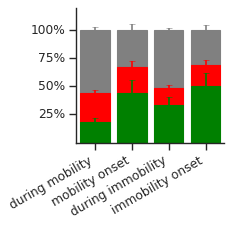

In [ ]:
oft.plotMeasureCorrelationCounts('movement','LHA-LHb','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

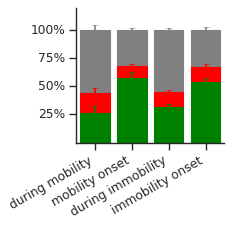

In [ ]:
oft.plotMeasureCorrelationCounts('movement','LHA-VTA','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

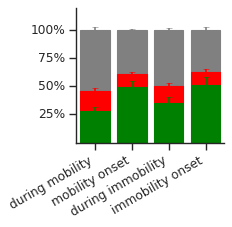

In [ ]:
oft.plotMeasureCorrelationCounts('movement','LHA-DRN','immobility',
                                   event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

#### TST

In [ ]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


In [ ]:
tst.getMeasurePerieventCorrelation('immobility','movement',win=3)

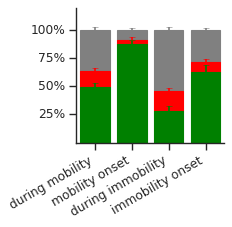

In [ ]:
tst.plotMeasureCorrelationCounts('movement','LHA-LHb','immobility',
                                 event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

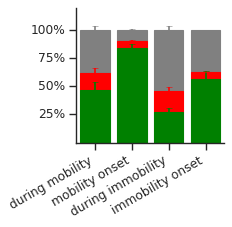

In [ ]:
tst.plotMeasureCorrelationCounts('movement','LHA-VTA','immobility',
                                  event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

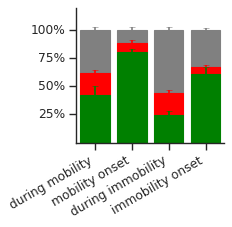

In [ ]:
tst.plotMeasureCorrelationCounts('movement','LHA-DRN','immobility',
                                  event_labels = ['during mobility','mobility onset','during immobility','immobility onset'])
plt.show()

# Cross-correltion between mobility score and calcium signal

#### OFT

In [ ]:
oft = FiberPhotometryTest(filename,'OFT')

Experiment information for test OFT is successfully loaded.


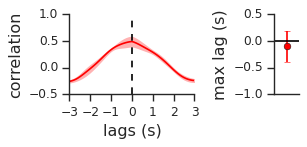

In [ ]:
oft.plotMeasureCrossCorrelation('movement','LHA-LHb','immobility','offset',
                                color='red',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_OFT_LHb.pdf')
plt.show()

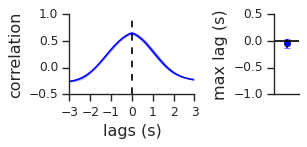

In [ ]:
oft.plotMeasureCrossCorrelation('movement','LHA-VTA','immobility','offset',
                                color='blue',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_OFT_VTA.pdf')
plt.show()

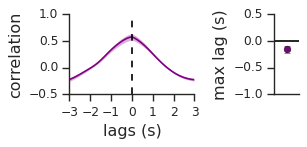

In [ ]:
oft.plotMeasureCrossCorrelation('movement','LHA-DRN','immobility','offset',
                                color='purple',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_OFT_DRN.pdf')
plt.show()

#### TST

In [ ]:
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test TST is successfully loaded.


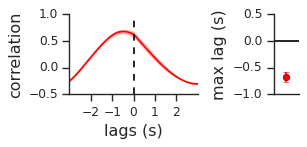

In [ ]:
tst.plotMeasureCrossCorrelation('movement','LHA-LHb','immobility','offset',
                                color='red',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_TST_LHb.pdf')
plt.show()

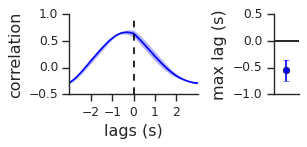

In [ ]:
tst.plotMeasureCrossCorrelation('movement','LHA-VTA','immobility','offset',
                                color='blue',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_TST_VTA.pdf')
plt.show()

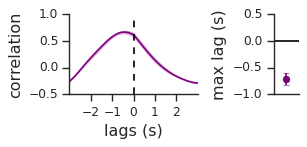

In [ ]:
tst.plotMeasureCrossCorrelation('movement','LHA-DRN','immobility','offset',
                                color='purple',ylim=[-0.5,1],yticks=[-0.5,0,0.5,1],xticks=[-2,-1,0,1,2],yticks1=[-1,-0.5,0,0.5],
                                save=True,imgname='../crosscorr_TST_DRN.pdf')
plt.show()

# Save summary data to excel file for statistical analysis

In [ ]:
apt = FiberPhotometryTest(filename,'APT')
sct = FiberPhotometryTest(filename,'SCT')
oft = FiberPhotometryTest(filename,'OFT')
tst = FiberPhotometryTest(filename,'TST')

Experiment information for test APT is successfully loaded.
Experiment information for test SCT is successfully loaded.
Experiment information for test OFT is successfully loaded.
Experiment information for test TST is successfully loaded.


In [ ]:
df_apt = apt.getDataFrameAUC('airpuff','onset',['baseline','airpuff'])
df_sct = sct.getDataFrameAUC('consumption','onset',['baseline','onset','drinking'])
df_oft = oft.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst = tst.getDataFrameAUC('immobility','offset',['immobile','preonset','onset','mobile'])
df_oft_mob = oft.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])
df_tst_mob = tst.getDataFrameAUCmeasure('immobility','offset',['immobile','preonset','onset','mobile'])

In [ ]:
exp = FiberPhotometryExperiment(filename)

Tests information is successfully loaded.


In [ ]:
df_corr = exp.getDataFrameRoutputs(tests=['APT','SCT','OFT','TST'])

In [ ]:
!pip install xlsxwriter
import xlsxwriter

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig1_LH_apt-sct-oft-tst.xlsx', engine='xlsxwriter')
df_apt.to_excel(writer,sheet_name='APT', index=False)
df_sct.to_excel(writer,sheet_name='SCT', index=False)
df_oft.to_excel(writer,sheet_name='OFT', index=False)
df_tst.to_excel(writer,sheet_name="TST", index=False)
df_oft_mob.to_excel(writer,sheet_name='OFT_mobileScore', index=False)
df_tst_mob.to_excel(writer,sheet_name="TST_mobileScore", index=False)
df_corr.to_excel(writer,sheet_name='outputCorrelation', index=False)
writer.save()

In [ ]:
df_total = exp.getDataFrameRmeasure('movement',['OFT','TST'])
df_peri = exp.getDataFrameMeasureCorrCounts('movement',['OFT','TST'],['LHA-DRN','LHA-VTA','LHA-LHb'])
df_oft = oft.getDataFrameCrossCorr('movement','immobility','offset')
df_tst = tst.getDataFrameCrossCorr('movement','immobility','offset')
df_oft['test'] = 'OFT'
df_tst['test'] = 'TST'
df_crossCorr = pd.concat([df_tst,df_oft])

In [ ]:
writer = pd.ExcelWriter('../sourcedata/fig2_LH_movementCorrelation.xlsx', engine='xlsxwriter')
df_total.to_excel(writer,sheet_name='total',index=False)
df_peri.to_excel(writer,sheet_name='perievent',index=False)
df_crossCorr.to_excel(writer,sheet_name='crossCorrelation',index=False)
writer.save()